Classification project using the bank dataset found here: https://archive.ics.uci.edu/dataset/222/bank+marketing
with the help of the tutorial here:
https://colab.research.google.com/github/pycaret/pycaret/blob/master/tutorials/Tutorial%20-%20Multiclass%20Classification.ipynb


In [1]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 57.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 69.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 18.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 66.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 11.2 M

In [1]:
# check installed version
import pycaret
pycaret.__version__

'3.2.0'

# 🚀 Quick start

**Dataset**
Attribute information:

For more information, read [Moro et al., 2011].

Input variables:

bank client data:
1 - age (numeric) 2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services") 3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed) 4 - education (categorical: "unknown","secondary","primary","tertiary") 5 - default: has credit in default? (binary: "yes","no") 6 - balance: average yearly balance, in euros (numeric) 7 - housing: has housing loan? (binary: "yes","no") 8 - loan: has personal loan? (binary: "yes","no")

related with the last contact of the current campaign:
9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 10 - day: last contact day of the month (numeric) 11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec") 12 - duration: last contact duration, in seconds (numeric)

other attributes:
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact) 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted) 15 - previous: number of contacts performed before this campaign and for this client (numeric) 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target): 17 - y - has the client subscribed a term deposit? (binary: "yes","no")

Missing Attribute Values: None

In [3]:
# loading sample dataset from after uploading to git
import numpy as np
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/Teakish/bank/main/bank-full.csv?token=GHSAT0AAAAAACLFETBQTKZEZOJJOZPHLONMZLN54FQ')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## Setup
This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has two required parameters i.e. `data` and `target`. All the other parameters are optional.

In [4]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(data, target = 'y', session_id = 123)

,Description,Value
0,Session id,123
1,Target,y
2,Target type,Binary
3,Target mapping,"no: 0, yes: 1"
4,Original data shape,"(45211, 17)"
5,Transformed data shape,"(45211, 49)"
6,Transformed train set shape,"(31647, 49)"
7,Transformed test set shape,"(13564, 49)"
8,Ordinal features,3
9,Numeric features,7


Once the setup has been successfully executed it shows the information grid containing experiment level information.

- **Session id:**  A pseudo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions.<br/>
<br/>
- **Target type:**  Binary, Multiclass, or Regression. The Target type is automatically detected. <br/>
<br/>
- **Label Encoding:**  When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. In this tutorial, no label encoding is required since the target variable is of numeric type. <br/>
<br/>
- **Original data shape:**  Shape of the original data prior to any transformations. <br/>
<br/>
- **Transformed train set shape :**  Shape of transformed train set <br/>
<br/>
- **Transformed test set shape :**  Shape of transformed test set <br/>
<br/>
- **Numeric features :**  The number of features considered as numerical. <br/>
<br/>
- **Categorical features :**  The number of features considered as categorical. <br/>

PyCaret has two set of API's that you can work with. (1) Functional (as seen above) and (2) Object Oriented API.

With Object Oriented API instead of executing functions directly you will import a class and execute methods of class.

In [5]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [6]:
# check the type of exp
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [7]:
# init setup on exp
exp.setup(data, target = 'y', session_id = 123)

,Description,Value
0,Session id,123
1,Target,y
2,Target type,Binary
3,Target mapping,"no: 0, yes: 1"
4,Original data shape,"(45211, 17)"
5,Transformed data shape,"(45211, 49)"
6,Transformed train set shape,"(31647, 49)"
7,Transformed test set shape,"(13564, 49)"
8,Ordinal features,3
9,Numeric features,7


You can use any of the two method i.e. Functional or OOP and even switch back and forth between two set of API's. The choice of method will not impact the results and has been tested for consistency.

## Compare Models

This function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [8]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9095,0.9372,0.9095,0.9014,0.9039,0.5100,0.5163,15.4660
lightgbm,Light Gradient Boosting Machine,0.9076,0.9356,0.9076,0.8999,0.9025,0.5052,0.5102,2.2780
gbc,Gradient Boosting Classifier,0.9062,0.9256,0.9062,0.8948,0.8970,0.4626,0.4765,5.7760
xgboost,Extreme Gradient Boosting,0.9061,0.9305,0.9061,0.8983,0.9010,0.4979,0.5027,1.1830
rf,Random Forest Classifier,0.9046,0.9279,0.9046,0.8917,0.8933,0.4358,0.4555,4.4840
lda,Linear Discriminant Analysis,0.9006,0.9070,0.9006,0.8906,0.8938,0.4562,0.4632,0.9390
lr,Logistic Regression,0.9002,0.9045,0.9002,0.8850,0.8866,0.3948,0.4183,4.7910
ridge,Ridge Classifier,0.8995,0.0000,0.8995,0.8830,0.8809,0.3506,0.3899,0.8410
ada,Ada Boost Classifier,0.8994,0.9113,0.8994,0.8855,0.8885,0.4143,0.4298,1.9700
et,Extra Trees Classifier,0.8994,0.9094,0.8994,0.8841,0.8861,0.3940,0.4158,4.6840


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

## Analyze Model

You can use the `plot_model` function to analyzes the performance of a trained model on the test set. It may require re-training the model in certain cases.

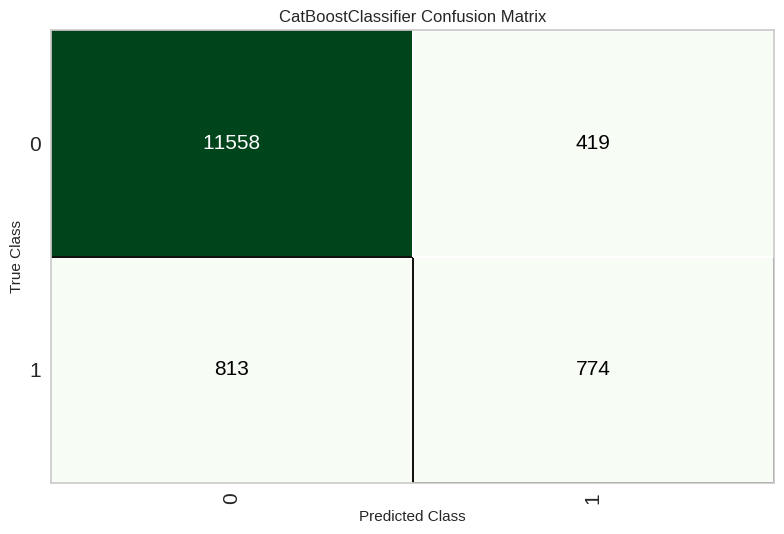

In [9]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

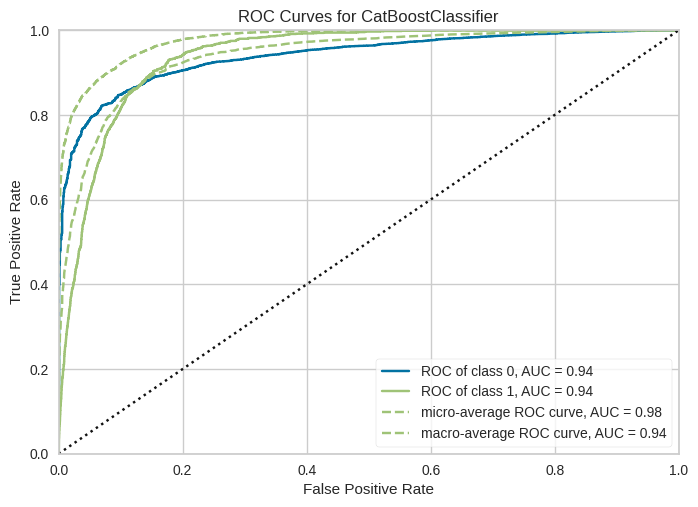

In [10]:
# plot AUC
plot_model(best, plot = 'auc')

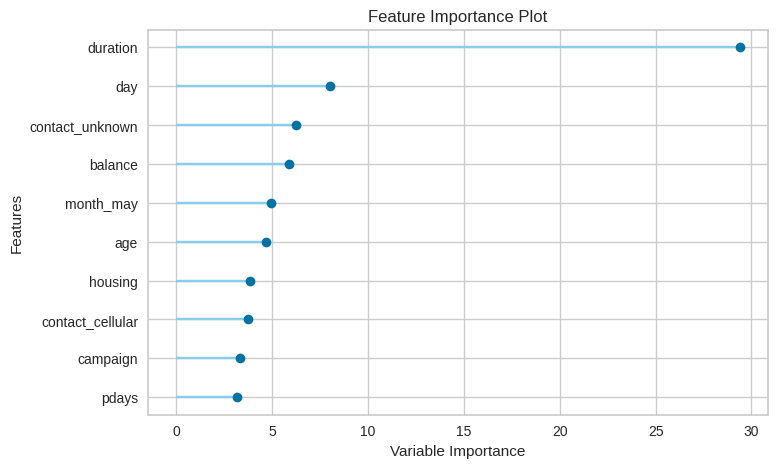

In [11]:
# plot feature importance
plot_model(best, plot = 'feature')

In [12]:
# check docstring to see available plots
help(plot_model)

Help on function plot_model in module pycaret.classification.functional:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Optional[dict] = None, plot_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, display_format: Optional[str] = None) -> Optional[str]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'auc'
        List of available plots (ID - Name):
    
        * 'pipeline'

An alternate to `plot_model` function is `evaluate_model`. It can only be used in Notebook since it uses ipywidget.

In [13]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Prediction
The `predict_model` function returns `prediction_label` and `prediction_score` (probability of the predicted class) as new columns in dataframe. When data is `None` (default), it uses the test set (created during the setup function) for scoring.

In [14]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9092,0.9392,0.9092,0.9009,0.9035,0.5074,0.5138


In [15]:
# show predictions df
holdout_pred.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,prediction_label,prediction_score
5997,26,blue-collar,single,secondary,no,339,yes,no,unknown,26,may,165,5,-1,0,unknown,no,no,0.9973
39268,34,blue-collar,married,secondary,no,463,yes,no,cellular,18,may,11,11,360,4,failure,no,no,0.9995
9555,59,retired,married,secondary,no,444,yes,no,unknown,6,jun,137,1,-1,0,unknown,no,no,0.9974
9044,47,entrepreneur,married,secondary,no,0,no,no,unknown,5,jun,1446,1,-1,0,unknown,yes,yes,0.5938
42981,34,management,divorced,tertiary,no,2885,no,no,cellular,10,feb,314,2,156,4,other,yes,yes,0.6032


The same function works for predicting the labels on unseen dataset. Let's create a copy of original data and drop the `Class variable`. We can then use the new data frame without labels for scoring.

In [16]:
# copy data and drop Class variable

new_data = data.copy()
new_data.drop('y', axis=1, inplace=True)
new_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown


In [17]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,prediction_label,prediction_score
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0.9914
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0.9995
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0.9999
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0.9996
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0.9980


## Save Model

Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [18]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'balance', 'day',
                                              'duration', 'campaign', 'pdays',
                                              'previous'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep...
                                     include=['job', 'marital', 'education',
                                              'contact', 'month', 'poutcome'],
      

In [19]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'balance', 'day',
                                             'duration', 'campaign', 'pdays',
                                             'previous'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_valu...
                                    include=['job', 'marital', 'education',
                                             'contact', 'month', 'poutcome'],
                                    transformer=OneHotEncoder(cols=['job',
                                                                    'marital',
                                                                    'education',
                                                                    'contact',
                                                                    'month',
                                                                    'poutcome'],
                                                              drop_invariant=False,
                                                              handle_missing='return_nan',
                                                              handle_unknown='value',
                                                              return_df=True,
                                                              use_cat_names=True,
                                                              verbose=0))),
                ('trained_model',
                 <catboost.core.CatBoostClassifier object at 0x79e2852b6170>)],
         verbose=False)

# 👇 Detailed function-by-function overview

## ✅ Setup
This function initializes the experiment in PyCaret and creates the transformation pipeline based on all the parameters passed in the function. Setup function must be called before executing any other function. It takes two required parameters: `data` and `target`. All the other parameters are optional and are used for configuring data preprocessing pipeline.

In [20]:
s = setup(data, target = 'y', session_id = 123)

,Description,Value
0,Session id,123
1,Target,y
2,Target type,Binary
3,Target mapping,"no: 0, yes: 1"
4,Original data shape,"(45211, 17)"
5,Transformed data shape,"(45211, 49)"
6,Transformed train set shape,"(31647, 49)"
7,Transformed test set shape,"(13564, 49)"
8,Ordinal features,3
9,Numeric features,7


To access all the variables created by the setup function such as transformed dataset, random_state, etc. you can use `get_config` method.

In [21]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [22]:
# lets access X_train_transformed
get_config('X_train_transformed')

,age,job_management,job_services,job_blue-collar,job_technician,job_entrepreneur,job_student,job_retired,job_admin.,job_housemaid,...,month_nov,month_mar,duration,campaign,pdays,previous,poutcome_success,poutcome_unknown,poutcome_failure,poutcome_other
44828,34.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,164.0,5.0,92.0,6.0,1.0,0.0,0.0,0.0
11344,47.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,156.0,3.0,-1.0,0.0,0.0,1.0,0.0,0.0
28435,26.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,291.0,1.0,244.0,4.0,0.0,0.0,1.0,0.0
39971,23.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,200.0,1.0,-1.0,0.0,0.0,1.0,0.0,0.0
5747,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,212.0,1.0,-1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11045,43.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,169.0,4.0,-1.0,0.0,0.0,1.0,0.0,0.0
44614,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,634.0,3.0,92.0,5.0,0.0,0.0,0.0,1.0
7162,48.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,413.0,2.0,-1.0,0.0,0.0,1.0,0.0,0.0
43243,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,409.0,1.0,-1.0,0.0,0.0,1.0,0.0,0.0


In [23]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


All the preprocessing configurations and experiment settings/parameters are passed into the `setup` function. To see all available parameters, check the docstring:

In [ ]:
# help(setup)

In [24]:
# init setup with normalize = True

s = setup(data, target = 'y', session_id = 123,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,y
2,Target type,Binary
3,Target mapping,"no: 0, yes: 1"
4,Original data shape,"(45211, 17)"
5,Transformed data shape,"(45211, 49)"
6,Transformed train set shape,"(31647, 49)"
7,Transformed test set shape,"(13564, 49)"
8,Ordinal features,3
9,Numeric features,7


<AxesSubplot: >

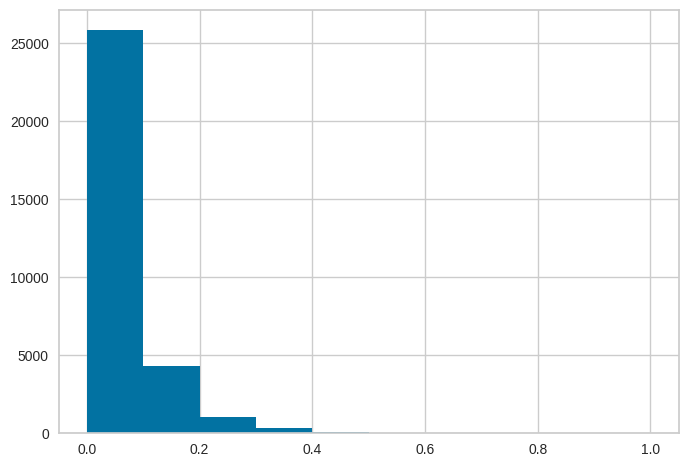

In [26]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['duration'].hist()

Notice that all the values are between 0 and 1 - that is because we passed `normalize=True` in the `setup` function. If you don't remember how it compares to actual data, no problem - we can also access non-transformed values using `get_config` and then compare. See below and notice the range of values on x-axis and compare it with histogram above.

<AxesSubplot: >

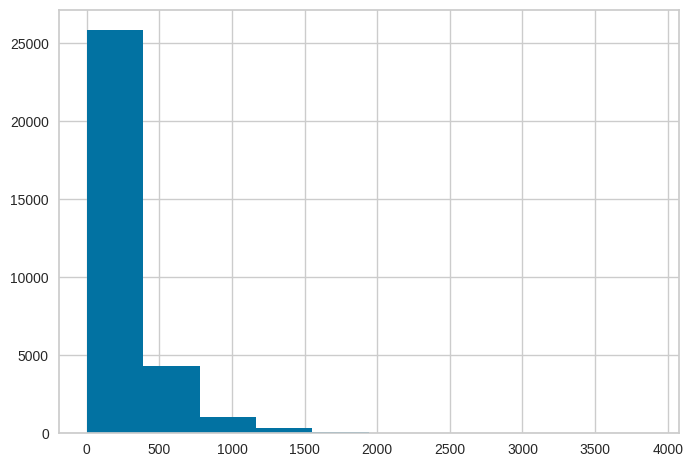

In [27]:
get_config('X_train')['duration'].hist()

## ✅ Compare Models
This function trains and evaluates the performance of all estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [29]:
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbc', 'xgboost', 'lightgbm', 'catboost'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9095,0.9372,0.9095,0.9014,0.9039,0.5100,0.5163,16.3490
lightgbm,Light Gradient Boosting Machine,0.9085,0.9358,0.9085,0.9011,0.9036,0.5118,0.5165,2.3540
gbc,Gradient Boosting Classifier,0.9062,0.9256,0.9062,0.8948,0.8970,0.4626,0.4765,5.7970
xgboost,Extreme Gradient Boosting,0.9061,0.9305,0.9061,0.8983,0.9010,0.4979,0.5027,1.3430
rf,Random Forest Classifier,0.9045,0.9279,0.9045,0.8915,0.8931,0.4345,0.4542,4.7710
et,Extra Trees Classifier,0.8994,0.9094,0.8994,0.8841,0.8861,0.3940,0.4158,4.6970
dt,Decision Tree Classifier,0.8774,0.7081,0.8774,0.8787,0.8780,0.4123,0.4125,1.6190


Processing:   0%|          | 0/33 [00:00<?, ?it/s]

In [ ]:
compare_tree_models

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [31]:
compare_tree_models_results = pull()
compare_tree_models_results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9095,0.9372,0.9095,0.9014,0.9039,0.5100,0.5163,16.349
lightgbm,Light Gradient Boosting Machine,0.9085,0.9358,0.9085,0.9011,0.9036,0.5118,0.5165,2.354
gbc,Gradient Boosting Classifier,0.9062,0.9256,0.9062,0.8948,0.8970,0.4626,0.4765,5.797
xgboost,Extreme Gradient Boosting,0.9061,0.9305,0.9061,0.8983,0.9010,0.4979,0.5027,1.343
rf,Random Forest Classifier,0.9045,0.9279,0.9045,0.8915,0.8931,0.4345,0.4542,4.771
et,Extra Trees Classifier,0.8994,0.9094,0.8994,0.8841,0.8861,0.3940,0.4158,4.697
dt,Decision Tree Classifier,0.8774,0.7081,0.8774,0.8787,0.8780,0.4123,0.4125,1.619


## ✅ MORE Plot Models

This function analyzes the performance of a trained model on the hold-out set. It may require re-training the model in certain cases.

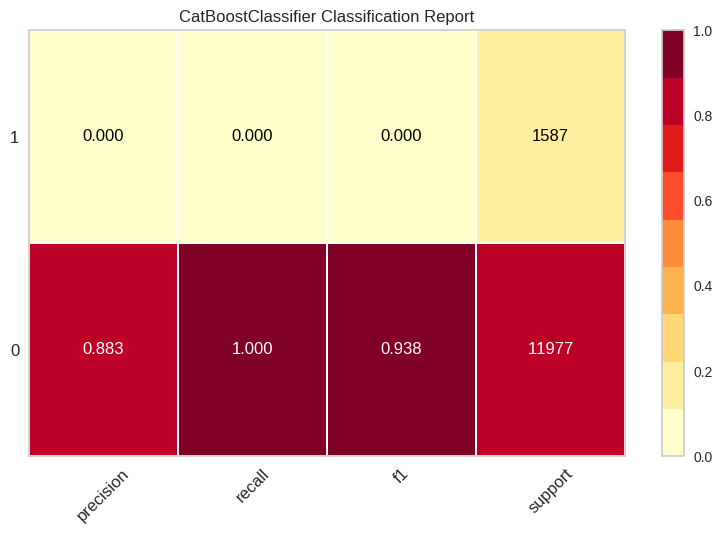

In [30]:
# plot class report
plot_model(best, plot = 'class_report')

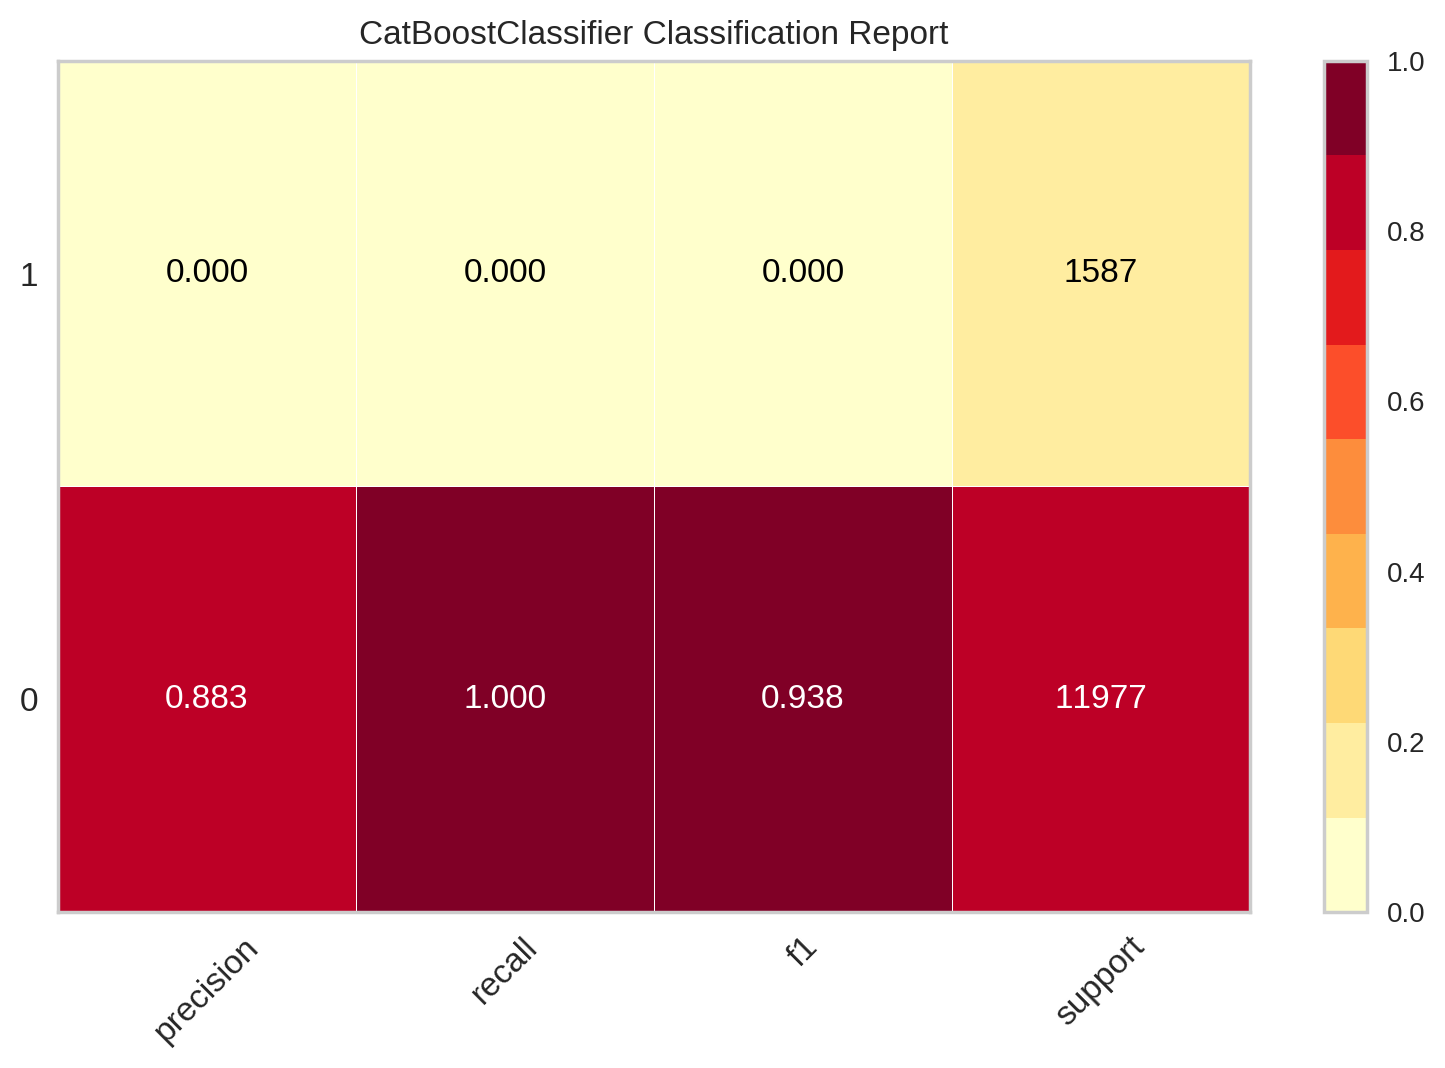

In [32]:
# to control the scale of plot
plot_model(best, plot = 'class_report', scale = 2)

In [33]:
# to save the plot
plot_model(best, plot = 'class_report', save=True)

'Class Report.png'

## ✅ Interpret Model

This function analyzes the predictions generated from a trained model. Most plots in this function are implemented based on the SHAP (Shapley Additive exPlanations). For more info on this, please see https://shap.readthedocs.io/en/latest/

In [34]:
# train catboost model
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9030,0.9289,0.9030,0.8946,0.8976,0.4810,0.4858
1,0.9103,0.9373,0.9103,0.9033,0.9058,0.5242,0.5285
2,0.9052,0.9268,0.9052,0.8968,0.8997,0.4894,0.4948
3,0.9055,0.9373,0.9055,0.8946,0.8973,0.4668,0.4781
4,0.9065,0.9400,0.9065,0.8999,0.9024,0.5091,0.5121
5,0.9090,0.9378,0.9090,0.9003,0.9028,0.5021,0.5094
6,0.9109,0.9355,0.9109,0.9020,0.9043,0.5072,0.5162
7,0.9131,0.9409,0.9131,0.9056,0.9078,0.5301,0.5364
8,0.9166,0.9433,0.9166,0.9102,0.9122,0.5553,0.5602


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

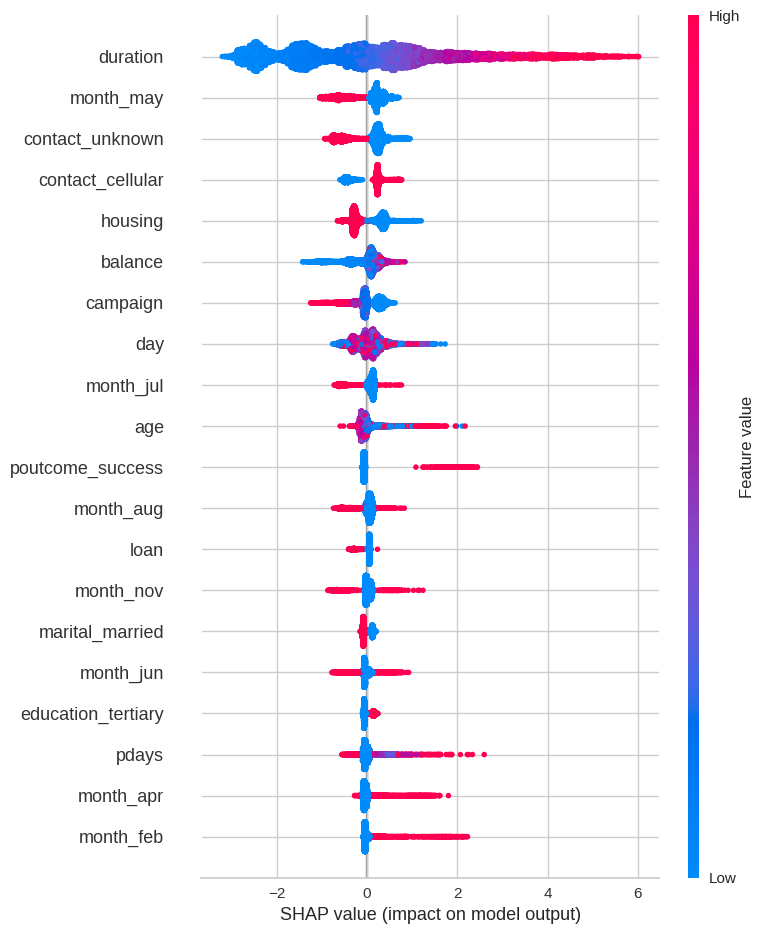

In [35]:
# interpret summary model
interpret_model(catboost, plot = 'summary')

In [36]:
# reason plot for test set observation 1
interpret_model(catboost, plot = 'reason', observation = 1)